In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade geopandas pyshp shapely descartes rasterio

### Import libraries

In [1]:
import io, requests, os, json

import numpy as np
import pandas as pd
import geopandas as gpd

import rasterio as rst
from rasterio.plot import show, show_hist
from rasterio.mask import mask

import matplotlib as mpl
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Counties

In [8]:
folder_path = '/content/drive/MyDrive/hansen/KEN/'

# All files ending with '_GEZ.json'
json_files = [f for f in os.listdir(folder_path) if f.endswith('_GEZ.json')]

# Load each JSON file into a gdf
for file in json_files:
    # Extract the county name
    county_name = file.split('_')[2]  # 3rd element when splitting by '_'

    # Each JSON file into a gdf
    globals()[county_name] = gpd.read_file(os.path.join(folder_path, file))

In [3]:
# gdf_list = [gdf_name for gdf_name in globals() if isinstance(globals()[gdf_name], gpd.GeoDataFrame)]
# print(gdf_list)

In [10]:
# Rift Valley counties
counties = [
    "Turkana",
    "West Pokot",
    "Samburu",
    "Trans Nzoia",
    "Uasin Gishu",
    "Elegeyo-Marakwet",
    "Nandi",
    "Baringo",
    "Laikipia",
    "Nakuru",
    "Narok",
    "Kajiado County",
    "Kericho",
    "Bomet"
]

In [11]:
# Create an empty gdf to concatenate gdfs
rift_valley = gpd.GeoDataFrame()

# Concatenate gdfs for each county
for county in counties:

    county_gdf = globals()[f"{county}"]

    # Append to the main gdf
    rift_valley = pd.concat([rift_valley, county_gdf])

# Reset index
# rift_valley.reset_index(drop=True, inplace=True)

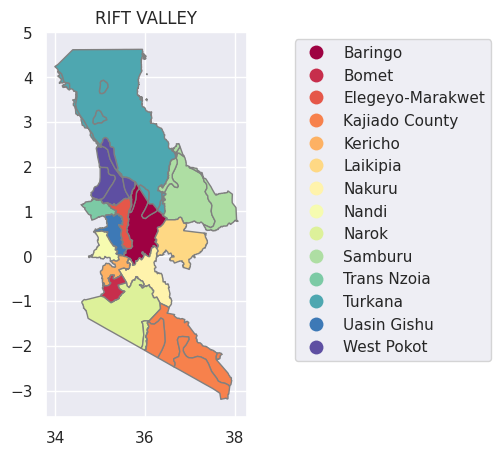

In [17]:
cmap = 'Spectral'
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('RIFT VALLEY')

rift_valley.plot(ax=ax, column='name', cmap=cmap, edgecolor='gray', legend=True)

# Move the legend to the right of the map
leg = ax.get_legend()
leg.set_bbox_to_anchor((2.25, 1))  # (horizontal, vertical)

plt.show()

In [18]:
rift_valley.to_file('/content/drive/MyDrive/rift_valley_geo.shp')

### Hansen for each county

In [ ]:
# Create two lists to store bounding boxes based on min-y value
counties_S = []
counties_N = []

for gdf_name, bbox in bounding_boxes.items():
    minx, miny, maxx, maxy = bbox
    if miny < 0:
        counties_S.append((gdf_name, bbox))
    else:
        counties_N.append((gdf_name, bbox))

# Counties with min-y < 0
print("Bounding Boxes with miny < 0:")
for gdf_name, bbox in counties_S:
    print(f"{gdf_name}: {', '.join(map(str, bbox))}")

# Counties with min-y > 0
print("\nBounding Boxes with miny > 0:")
for gdf_name, bbox in counties_N:
    print(f"{gdf_name}: {', '.join(map(str, bbox))}")

Bounding Boxes with miny < 0:
states: 33.9106686004, -4.6782097814, 41.9067501996, 4.6199999998
Kitui: 37.5955253003, -3.0707527, 39.0761161004, -0.0554329008
Makueni: 37.1427054996, -2.9946237002, 38.5205114997, -1.5176177002
Tana River: 38.4199270996, -3.0693488997, 40.7342545999, -0.0039801998
Siaya: 33.9840419003, -0.4028367997, 34.5599418003, 0.3110221996
Kericho: 35.0054984001, -0.6654793008, 35.6757254997, 0.0252894998
Kwale: 38.4487922004, -4.6782097814, 39.6432027721, -3.5719733999
Kiambu County: 36.4923148003, -1.3055549012, 37.3629204991, -0.7594734006
Machakos: 36.8789115003, -1.7801643002, 37.8674978997, -0.7770515007
Kisumu: 34.4169364, -0.4168269998, 35.3433279996, 0.0226311002
Kisii: 34.6353201999, -0.9734627002, 35.0133200998, -0.5041632997
Bomet: 35.0129447003, -1.0371834004, 35.5878958991, -0.4015553998
Taita Taveta: 37.5845500999, -4.1417295004, 39.2199148989, -2.6847664013
Kajiado County: 36.0007376998, -3.1961469007, 37.9379325003, -1.0467689
Nyamira: 34.779302100

In [ ]:
# Create two lists to store counties based on their bounding box position
rift_valley_S = []
rift_valley_N = []

for county in counties:

    if county in [county_name for county_name, _ in counties_S]:
        rift_valley_S.append(county)

    elif county in [county_name for county_name, _ in counties_N]:
        rift_valley_N.append(county)

print("Counties S:", rift_valley_S)
print("Counties N:", rift_valley_N)

Counties S: ['Nandi', 'Baringo', 'Laikipia', 'Nakuru', 'Narok', 'Kajiado County', 'Kericho', 'Bomet']
Counties N: ['Turkana', 'West Pokot', 'Samburu', 'Trans Nzoia', 'Uasin Gishu', 'Elegeyo-Marakwet']


In [ ]:
rift_valley_S_gdfs = []
for name in rift_valley_S:
    if name in globals():
        rift_valley_S_gdfs.append(globals()[name])

In [ ]:
rift_valley_N_gdfs = []
for name in rift_valley_N:
    if name in globals():
        rift_valley_N_gdfs.append(globals()[name])

In [ ]:
# open Hansen tile
temp_rst = '/content/drive/MyDrive/hansen/Hansen_00N_030E.tif'
temp_img = rst.open(temp_rst)

In [ ]:
for dataframe in rift_valley_S_gdfs:

    dataframe_name = [name for name, var in globals().items() if var is dataframe][0]

    # Clip raster
    out_temp, out_transform = mask(temp_img, [geom for geom in dataframe.geometry], crop=True, pad=True)

    out_meta = temp_img.meta
    out_meta.update({"driver": "GTiff",
                     "height": out_temp.shape[1],
                     "width": out_temp.shape[2],
                     "transform": out_transform})

    output_file = f'/content/drive/MyDrive/hansen/State Hansen/{dataframe_name}_Hansen.tif'

    with rst.open(output_file, 'w', **out_meta) as dest:
        dest.write(out_temp)

In [ ]:
# open Hansen tile
temp_rst = '/content/drive/MyDrive/hansen/Hansen_10N_030E.tif'
temp_img = rst.open(temp_rst)

In [ ]:
for dataframe in rift_valley_N_gdfs:

    dataframe_name = [name for name, var in globals().items() if var is dataframe][0]

    # Clip raster
    out_temp, out_transform = mask(temp_img, [geom for geom in dataframe.geometry], crop=True, pad=True)

    out_meta = temp_img.meta
    out_meta.update({"driver": "GTiff",
                     "height": out_temp.shape[1],
                     "width": out_temp.shape[2],
                     "transform": out_transform})

    output_file = f'/content/drive/MyDrive/hansen/State Hansen/{dataframe_name}_Hansen.tif'

    with rst.open(output_file, 'w', **out_meta) as dest:
        dest.write(out_temp)

### Polygonize

In [ ]:
from rasterio.features import shapes
from shapely.geometry import shape

In [ ]:
tif_directory = '/content/drive/MyDrive/hansen/State Hansen'

for filename in os.listdir(tif_directory):
    if filename.endswith('.tif'):
        tif_path = os.path.join(tif_directory, filename)
        mask = None
        with rst.Env():
            with rst.open(tif_path) as src:
                image = src.read(1)
                results = ({'properties': {'raster_val': v}, 'geometry': s}
                           for i, (s, v) in enumerate(shapes(image, mask=mask, transform=src.transform)) if v >= 15)
        geoms = list(results)
        tif_name = os.path.splitext(filename)[0]
        gdf = gpd.GeoDataFrame.from_features(geoms)
        gdf.to_file(f'/content/drive/MyDrive/hansen/hansen_15/{tif_name}.shp')

### Terrestrial-eco

In [ ]:
terreseco = gpd.read_file('/content/drive/MyDrive/hansen/TerrestrialEcoregionsoftheWorld_WWF.geojson')

In [ ]:
shapefiles_dir = '/content/drive/MyDrive/hansen/hansen_15'

for filename in os.listdir(shapefiles_dir):
    if filename.endswith('.shp'):

        filepath = os.path.join(shapefiles_dir, filename)
        shapefile = gpd.read_file(filepath)

        # Clip the Terrestrial Ecoregions
        clipped_eco = terreseco.clip(shapefile)

        output_filename = os.path.join('/content/drive/MyDrive/hansen/eco/', filename.replace('.shp', '_eco.shp'))
        clipped_eco.to_file(output_filename)

In [ ]:
directory = '/content/drive/MyDrive/hansen/eco/'

forest_cover = gpd.GeoDataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.shp'):
        filepath = os.path.join(directory, filename)
        gdf = gpd.read_file(filepath)
        forest_cover = pd.concat([forest_cover, gdf], ignore_index=True)

In [19]:
forest_cover = gpd.read_file('/content/drive/MyDrive/hansen/eco/Rift_Valley_Hansen.shp')

<ipython-input-26-21b72e493b05>:5: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  rift_valley.plot(ax=ax, column='name', color='None', edgecolor='black', alpha=0.1, legend=False)


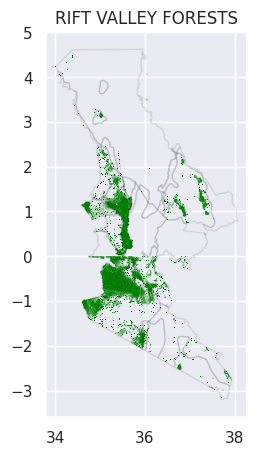

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('RIFT VALLEY FORESTS')

forest_cover.plot(ax=ax, color='green', edgecolor='None')
rift_valley.plot(ax=ax, column='name', color='None', edgecolor='black', alpha=0.1, legend=False)

plt.show()

<ipython-input-28-95691ce1a5cb>:6: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  rift_valley.plot(ax=ax, column='name', color = 'None', edgecolor='black', alpha=0.1, legend=False)


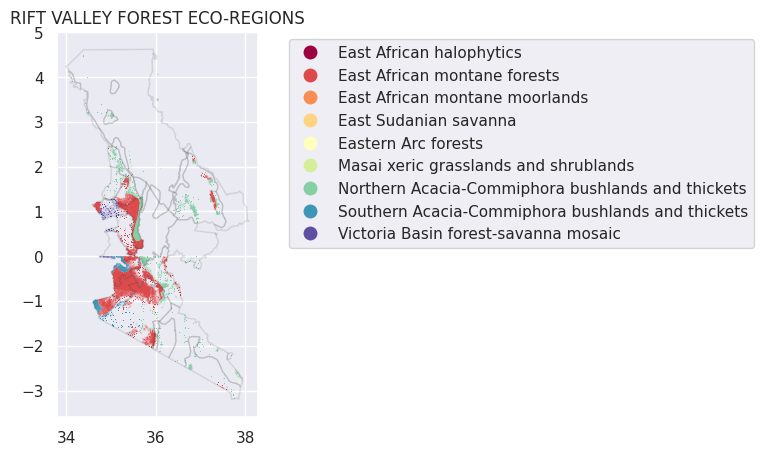

In [28]:
cmap = 'Spectral'
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('RIFT VALLEY FOREST ECO-REGIONS')

forest_cover.plot(ax=ax, column='ECO_NAME', cmap=cmap, edgecolor='None', legend=True)
rift_valley.plot(ax=ax, column='name', color = 'None', edgecolor='black', alpha=0.1, legend=False)

# Move the legend to the right of the map
leg = ax.get_legend()
leg.set_bbox_to_anchor((3.5, 1))  # (horizontal, vertical)

plt.show()